## Fantasy Wrap-up for 2016 D-I College Nationals

We'll scrape data from the USAU website to [find the winner of /r/ultimate's fantasy lineup contest](https://www.reddit.com/r/ultimate/comments/4l74rn/fantasy_lineup_di_college_nationals_2016/), and along the way find which players made the biggest score contributions at nationals, and how that correlated with users' fantasy valuations.

All of the following is being run in a [jupyter notebook](http://jupyter.org/), which anyone can modify and run after installing python and a few other dependencies. Further instructions can be found in the [github README](https://github.com/azjps/usau-py).

We first set up some simple imports and display settings.

In [1]:
import usau.reports
import usau.fantasy

In [2]:
from IPython.display import display, HTML
import pandas as pd
pd.options.display.width = 200
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

First we'll need to scrape data from the USAU website. I've also downloaded the data offline in the form of csvs, and the following cell instructs to load the data from these csvs instead of scraping the website on-the-fly. (A wrapper script for downloading the data can be found in `usau/download_reports.py`.) Stat-keeping seemed to be done pretty comprehensively this tournament, with [only a couple of women's consolation games](../notebooks/2016-D-I_College_Nationals_Data_Quality.ipynb) missing player statistics. Unlikely last year's tournament, stat-keepers also seemed to have done a good job recording players' Ds and turnovers.

In [3]:
# Read data from csv files
usau.reports.d1_college_nats_men_2016.load_from_csvs()
usau.reports.d1_college_nats_women_2016.load_from_csvs()
None  # No output

Let's also retrieve the fantasy picks from the /r/ultimate fantasy competition:

In [4]:
mens_fantasy, womens_fantasy, contest_users = usau.fantasy.compute_fantasy_picks()
display_cols = ["No.", "Name", "Fantasy Score", "Position", "Height",
                "Goals", "Assists", "Ds", "Turns",
                "Team", "Seed", "Fantasy Picks"]

And without further ado, the **winner of the fantasy competition is [/u/ultimatefrisbee](http://reddit.com/u/ultimatefrisbee)**, with [/u/scottyskin96](http://reddit.com/u/scottyskin96) and [/u/duthracht](http://reddit.com/u/duthracht) respectively scoring the highest in the Men's and Women's competitions.

In [5]:
usau.fantasy.compute_fantasy_contest_results(display=False).reset_index(drop=True).style \
  .bar(subset=["Total", "Women's"],
       color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=["Men's"],
       color='rgba(200, 80, 80, 0.5)')

/apps/stonefs1/azhu/libs/usau_fantasy/usau/fantasy.py:81: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  .sort(["Fantasy Score", "Seed"], ascending=False))
/apps/stonefs1/azhu/libs/usau_fantasy/usau/fantasy.py:116: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  results = results.sort("Total", ascending=False)[["User", "Total", "Men's", "Women's"]]


### A look at the player statistics

Here are all players picked in fantasy, mixed with the other top fantasy point scoring athletes. "Fantasy point score" here is arbitrarily defined by the formula $G + A + 0.2 \times D - 0.2 \times T$. Ds and turns were weighted lightly mostly because I was worried that they might not be kept very accurately, but it seems the stat-keepers did a good job following these. *Please note that as these statistics are for fantasy, where one of the objectives was to predict which teams would go deepest, none of the statistics in this notebook are normalized for games played, points played, and so forth.* Such might be a good subject for another notebook though, wink wink.

In [6]:
usau.fantasy.compute_athlete_fantasy_scores(mens_fantasy, min_players=25)[display_cols].style \
  .bar(subset=['Fantasy Score', 'Goals', 'Ds', 'Fantasy Picks'],
             color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=['Assists', 'Turns'],
             color='rgba(200, 80, 80, 0.5)')

At a glance, its clear the dynamic duos of the two teams which made it the deepest, Stubbs and Vandenberg of Harvard and Osgar and Jagt of Minnesota, racked up the most impressive stat lines of the tournaments. Osgar in particular managed this despite sitting out the Minnesota's semifinal win with a knee injury, and playing through the same injury in the finals.

In [7]:
usau.fantasy.compute_athlete_fantasy_scores(womens_fantasy, min_players=25)[display_cols].style \
  .bar(subset=['Fantasy Score', 'Goals', 'Ds', 'Fantasy Picks'],
             color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=['Assists', 'Turns'],
             color='rgba(200, 80, 80, 0.5)')

It is perhaps surprising then that the top women's stat lines belonged to the Dartmouth duo Angela Zhu and Jaclyn Verzuh, as Dartmouth exited the tournament in the quarterfinals, playing 2 fewer games than the finalists Stanford and Whitman. This is not to take away anything from Gegg/White and Hardesty/Revere, who anchored the deeper lines of their respective teams and put in respectable stats too.

Let's get a graphical sense of the highest performers, as far as stat lines went:

In [8]:
# Clean up the data a little bit
mens_fantasy_clean = usau.fantasy.compute_athlete_fantasy_scores(mens_fantasy, min_players=len(mens_fantasy))[display_cols]
womens_fantasy_clean = usau.fantasy.compute_athlete_fantasy_scores(womens_fantasy, min_players=len(womens_fantasy))[display_cols]
mens_fantasy_clean["Gender"] = "Men"
womens_fantasy_clean["Gender"] = "Women"
fantasy_clean = pd.concat([mens_fantasy_clean, womens_fantasy_clean]).sort(columns=["Fantasy Score"], ascending=False)
# Plotting styles
style_args = {"alpha": 0.5, "markeredgewidth": 0.5}
sns_blue, sns_green, sns_red, sns_magenta, sns_yellow, sns_cyan = sns.color_palette()

/spare/local/azhu/venv_el6-usau-stonelib/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


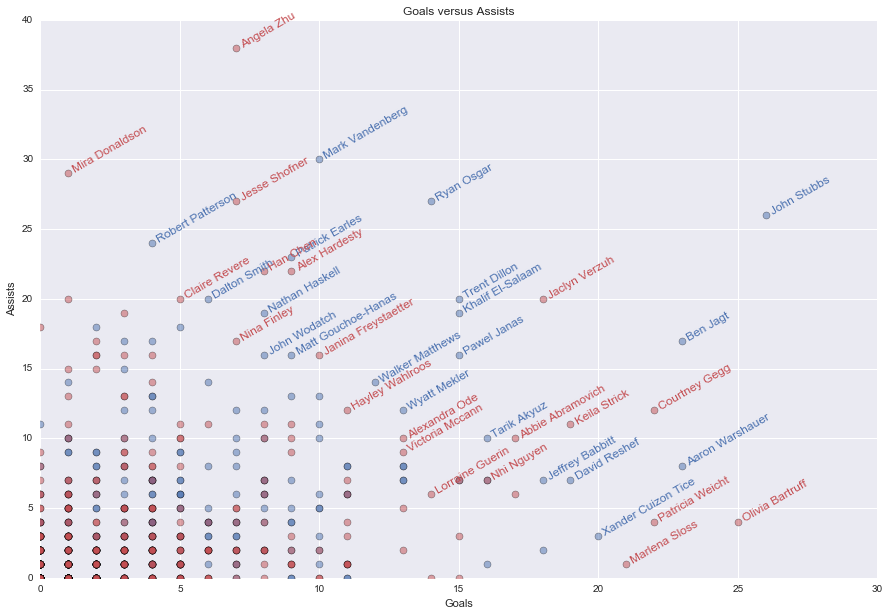

In [9]:
# Plot goals versus assists, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(mens_fantasy_clean.Goals, mens_fantasy_clean.Assists, "o", color=sns_blue, **style_args)
ax.plot(womens_fantasy_clean.Goals, womens_fantasy_clean.Assists, "o", color=sns_red, **style_args)
ax.set_xlabel("Goals")
ax.set_ylabel("Assists")
ax.set_title("Goals versus Assists")
for _, row in mens_fantasy_clean.head(20).iterrows():
  adjustment = 0.2
  ax.annotate(row["Name"], xy=(row["Goals"] + adjustment, row["Assists"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=sns_blue)
for _, row in womens_fantasy_clean.head(20).iterrows():
  adjustment = 0.2
  ax.annotate(row["Name"], xy=(row["Goals"] + adjustment, row["Assists"] + adjustment),
              ha='left', va='center', rotation=30, wrap=True, color=sns_red)

John Stubb's contributions across the tournament can't be understated; he excelled on both sides of the disc, catching the most goals across both genders while also having the sixth highest assist count (behind only Osgar and teammate Vandenberg on the men's side). Angela Zhu also impressively notched over 25% more assists than anyone else in the tournament.

Who were the most efficient players, with lots of contributions but few turnovers?

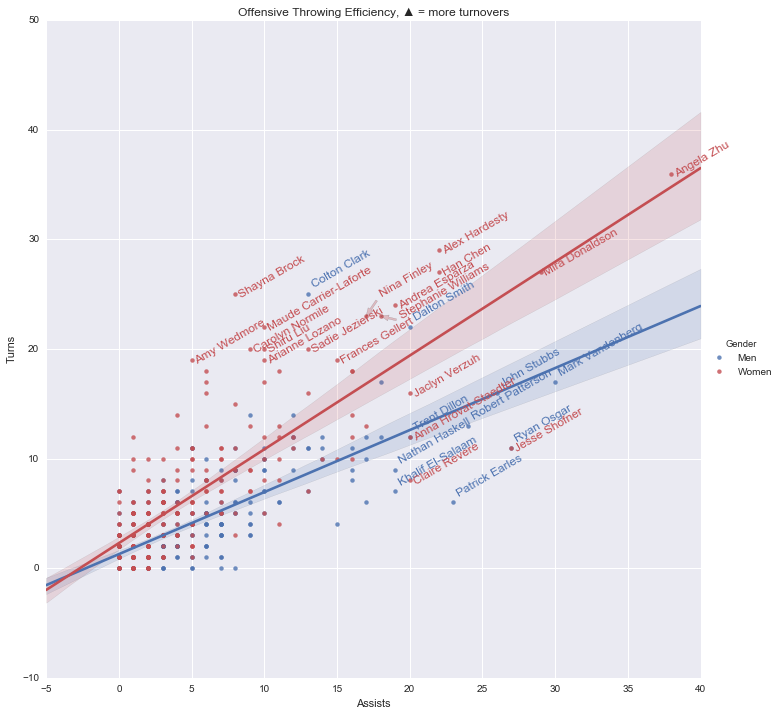

In [10]:
# Plot As versus turns, labelling the top values of both genders
# Using the top 500 players by fantasy (at least 2 scores/assists) to prune some of the null data
g = sns.lmplot("Assists", "Turns", fantasy_clean.head(500), hue="Gender",
               size=10, palette={"Men": sns_blue, "Women": sns_red})
g.ax.set_title(u"Offensive Throwing Efficiency, ▲ = more turnovers")
for _, row in mens_fantasy_clean[(mens_fantasy_clean.Assists > 18) |
                                 (mens_fantasy_clean.Turns > 18)].iterrows():
  adjustment = 0.3
  xy = (row["Assists"] + adjustment, row["Turns"] + 0.8)
  g.ax.annotate(row["Name"], xy=xy,
                ha='left', va='center', rotation=30, wrap=True, color=sns_blue)
for _, row in womens_fantasy_clean[(womens_fantasy_clean.Assists > 18) |
                                   (womens_fantasy_clean.Turns > 18)].iterrows():
  adj = 0.3
  x = row["Assists"]
  y = row["Turns"]
  # Couple of special cases for people whose names are obscured
  if row["Name"] == "Nina Finley":
    g.ax.annotate(row["Name"], xy=(x, y), xytext=(x + 1.0, y + 2.0),
                  arrowprops=dict(facecolor=sns_red, headwidth=6, headlength=8, width=2.0, alpha=0.3),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)
  elif row["Name"] == "Stephanie Williams":
    g.ax.annotate(row["Name"], xy=(x, y), xytext=(x + 1.4, y),
                  arrowprops=dict(facecolor=sns_red, headwidth=6, headlength=8, width=2.0, alpha=0.3),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)
  else:  
    g.ax.annotate(row["Name"], xy=(x + adj, y + adj - 0.4),
                  ha='left', va='center', rotation=30, wrap=True, color=sns_red)

Not surprisingly, the backfield players shouldering the responsibility for distributing the disc tended to have more turnovers. For the number of touches Angela Zhu had, her assist/turnover ratio was still quite respectable compared to other elite handlers (Hardesty, Lozano Chen). Jesse Shofner also was impressively consistent. On the men's side, Pat Earles stood out with the best assist/turnover ratio, despite having a reputation of being trigger-happy with the disc. For example, he threw more assists than Dalton Smith, with 3x fewer turnovers (although of course, some of this has to be attributed to Pittsburgh's offensive receivers' prowess). In general, the women's side tended to have a higher ratio of turnovers, which were probably exacerbated by the weather conditions on Sunday.

How about on defense?

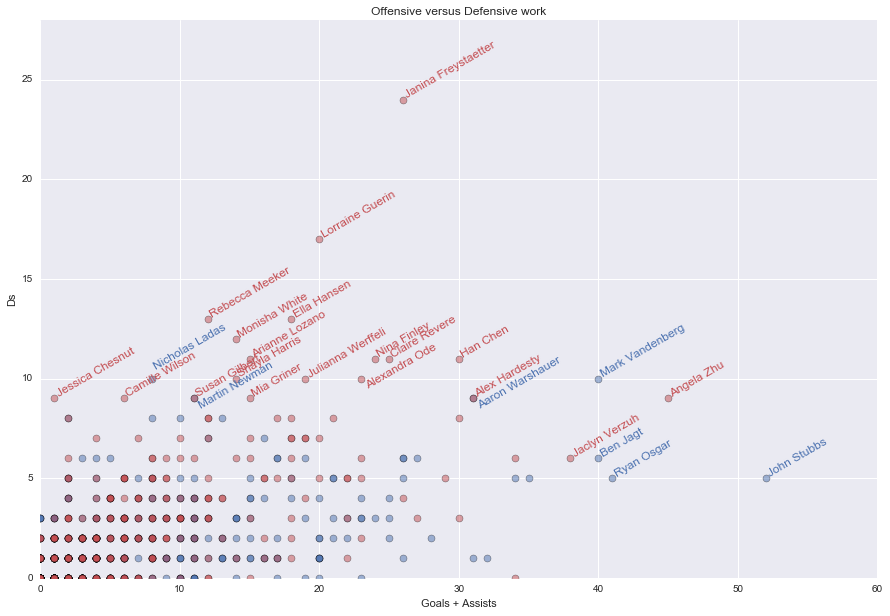

In [11]:
# Plot goals+assists versus Ds, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(mens_fantasy_clean.Goals + mens_fantasy_clean.Assists, mens_fantasy_clean.Ds, "o", color=sns_blue, **style_args)
ax.plot(womens_fantasy_clean.Goals + womens_fantasy_clean.Assists, womens_fantasy_clean.Ds, "o", color=sns_red, **style_args)
ax.set_xlabel("Goals + Assists")
ax.set_ylabel("Ds")
ax.set_title("Offensive versus Defensive work")
ax.set_ylim(0, 28)
for _, row in fantasy_clean[(fantasy_clean.Ds > 8) |
                            (fantasy_clean.Goals + fantasy_clean.Assists > 35)].iterrows():
  adjustment = 0.2
  x, y = row["Goals"] + row["Assists"], row["Ds"]
  color = sns_blue if row["Gender"] == "Men" else sns_red
  if row["Name"] == "Nicholas Ladas":
    ax.annotate(row["Name"], xy=(x, y), xytext=(x + 0.2, y + 0.6),
                ha='left', va='center', rotation=30, wrap=True, color=color)
  elif row["Name"] in ("Aaron Warshauer", "Martin Newman", "Alexandra Ode"):
    ax.annotate(row["Name"], xy=(x, y), xytext=(x + 0.4, y - 0.4),
                ha='left', va='center', rotation=30, wrap=True, color=color)
  else:
    ax.annotate(row["Name"], xy=(x + adjustment,y  + adjustment),
                ha='left', va='center', rotation=30, wrap=True, color=color)

It was hard to come by Ds on the men's side, but on the women's side, Janina Freystaetter really impressed on defense. She came up huge with 24 Ds, including 7 in their universe point loss to the finalists Whitman Sweets. She averaged 5.5 defensive blocks a game across UCF's four pool play games, and probably would have notched up a lot more if injuries and a short roster didn't bring UCF down.

### Fantasy valuations

How good was /r/ultimate at predicting the best fantasy players? Not that bad, really.

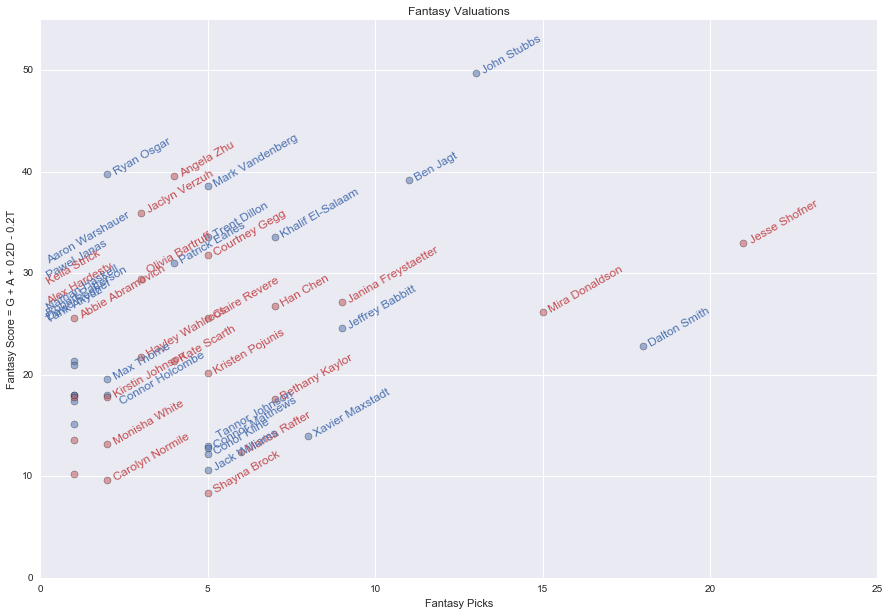

In [12]:
# Plot goals versus assists, labelling the top 20 performers of both genders
fig, ax = plt.subplots(figsize=(15, 10))
mens_fantasy_pos = mens_fantasy_clean[mens_fantasy_clean["Fantasy Picks"] > 0]
womens_fantasy_pos = womens_fantasy_clean[womens_fantasy_clean["Fantasy Picks"] > 0]
ax.plot(mens_fantasy_pos["Fantasy Picks"], mens_fantasy_pos["Fantasy Score"], "o", color=sns_blue, **style_args)
ax.plot(womens_fantasy_pos["Fantasy Picks"], womens_fantasy_pos["Fantasy Score"], "o", color=sns_red, **style_args)

ax.set_xlabel("Fantasy Picks")
ax.set_ylabel("Fantasy Score = G + A + 0.2D - 0.2T")
ax.set_title("Fantasy Valuations")
ax.set_ylim(0, 55)
for _, row in fantasy_clean[(fantasy_clean["Fantasy Picks"] > 1) |
                            (fantasy_clean["Fantasy Score"] > 25)].iterrows():
  x = row["Fantasy Picks"]
  y = row["Fantasy Score"]
  adjustment = 0.2
  color = sns_blue if row["Gender"] == "Men" else sns_red
  # Couple of special cases for people whose names are obscured
  if row["Name"] == "Tannor Johnson":
    ax.annotate(row["Name"], xy=(x, y), xytext=(x + 0.3, y + 1.0),
                ha='left', va='center', rotation=30, wrap=True, color=color)
  elif row["Name"] == "Connor Holcombe":
    ax.annotate(row["Name"], xy=(x, y), xytext=(x + 0.4, y - 0.7),
                ha='left', va='center', rotation=30, wrap=True, color=color)
  elif row["Name"] == "Olivia Bartruff":
    ax.annotate(row["Name"], xy=(x, y), xytext=(x + 0.2, y + 0.8),
                ha='left', va='center', rotation=30, wrap=True, color=color)
  else:
    ax.annotate(row["Name"], xy=(x + adjustment, y + adjustment),
                ha='left', va='center', rotation=30, wrap=True, color=color)

Ryan Osgar has to win the title for "most valuable pick", being picked only twice (including by yours truly) while having the second highest fantasy score line. Although he was Minnesota's Callahan nominee, most users opted to go for his teammate Ben Jagt, who also ended with a similar fantasy score line. On the women's side, Dartmouth duo Zhu and Verzuh were the highest scoring players on fantasy, although most users opted for Jesse Shofner.

Ultimately, the best picks mostly came down to whether the team managed to survive deep into the tournament. UMass and UNC-W were eliminated by pre-quarters, limiting the scoring impacts of Tannor Johnson, Conor Kline, Jack Williams, and Xavier Maxstadt. UCF Shayna Brock seemed like a good choice prior to the tournament, due to the tight rotation UCF runs allowing Brock to get a lot of touches, but the same tight rotation (plus injuries) caused UCF to exhaust themselves early out of the tournament. Brock ended the tournament with 25 Turns and only 12 score contributions.

There were several strong picks who were passed over entirely by /r/ultimate, despite plenty of name recognization. Namely: Warshaeur (UNC) and Pawel Janas (Colorado) on the Men's side, and Keila Strick (Virginia) and Hardesty (Whitman) on the Women's side. The best lines with 0 /r/ultimate picks would be:

* Men's: **Aaron Warshauer (North Carolina)**, Pawel Janas (Colorado), Nathan Haskell (Georgia), Robert Patterson (Florida State), David Reshef (Harvard), Tarik Akyuz (Case Western Reserve), Walker Matthews (North Carolina)
* Women's: **Keila Strick (Virginia)**, Alex Hardesty (Whitman), Patricia Weicht (Colorado College), Alexandra Ode (Oregon), Nhi Nguyen (Colorado), Marlena Sloss (Whitman), Lorraine Guerin (Wisconsin)

In [13]:
# mens_fantasy_clean["Name (Team)"] = mens_fantasy_clean.apply(
#     lambda row: "{name} ({team})".format(name=row["Name"], team=row["Team"]), axis=1)
# womens_fantasy_clean["Name (Team)"] = womens_fantasy_clean.apply(
#     lambda row: "{name} ({team})".format(name=row["Name"], team=row["Team"]), axis=1)
mens_best_no_pick = mens_fantasy_clean[mens_fantasy_clean["Fantasy Picks"] == 0].head(7)["Name"].values
womens_best_no_pick = womens_fantasy_clean[womens_fantasy_clean["Fantasy Picks"] == 0].head(7)["Name"].values
mens_best_no_pick[0] = mens_best_no_pick[0] + "*"
womens_best_no_pick[0] = womens_best_no_pick[0] + "*"
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0, display=False,
                                             fantasy_input={"no_r_ultimate":
                                                            {"Men": mens_best_no_pick,
                                                             "Women": womens_best_no_pick}})

,User,Total,Men's,Women's
0,no_r_ultimate,417.6,219.2,198.4


Not bad, but also not great -- excluding /r/ultimate's picks, one could have still placed about midway in the fantasy contest. /r/ultimate did a good job of picking the top end picks for both gender divisions.

### Fantasy variations

Just for fun, how would things have shaken up if the rules for fantasy had been perturbed a little bit? What happens if (1): we remove the captain multiplier, (2): we increase the weight of Ds and Turns, (3): we increase the weight of Ds and Turns even more?

In [14]:
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0,
                                             display=False, captain_multiplier=1).head(5).reset_index().style \
  .bar(subset=["Total", "Women's"],
       color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=["Men's"],
       color='rgba(200, 80, 80, 0.5)')

In [15]:
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0,
                                             display=False, beta=0.5).head(5).reset_index().style \
  .bar(subset=["Total", "Women's"],
       color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=["Men's"],
       color='rgba(200, 80, 80, 0.5)')

In [16]:
usau.fantasy.compute_fantasy_contest_results(from_csv=True, min_players=0,
                                             display=False, beta=1.0).head(5).reset_index().style \
  .bar(subset=["Total", "Women's"],
       color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=["Men's"],
       color='rgba(200, 80, 80, 0.5)')

Sigh, alright, /u/ultimatefrisbee, looks like we can't push you off the pedestal!

How about single-game fantasy? Here were the best performances by a player in a single game.

In [17]:
match_reports = pd.concat([usau.reports.d1_college_nats_men_2016.match_reports,
                           usau.reports.d1_college_nats_women_2016.match_reports])
match_reports['Fantasy Picks'] = 1
usau.fantasy.compute_athlete_fantasy_scores(match_reports) \
    [["No.", "Name","Fantasy Score", "Gs", "As", "Ds", "Ts", "Team", "Opp Team", "Score", "Opp Score"]].head(15).style \
  .bar(subset=['Fantasy Score', 'As', 'Ts'],
             color='rgba(80, 200, 100, 0.5)') \
  .bar(subset=['Gs', 'Ds'],
             color='rgba(200, 80, 80, 0.5)')

While Stubb's first half vs UNC was the material of legends, surely John Wodatch's insane performance versus UNC-W has to go down as the best single player performance in a single game. Wodatch combined for 11 of 15 UConn's points of the game while only throwing one turnover (and making up for it with a D). Verzuh also was everywhere for Dartmouth in their quarterfinals loss to Virginia. Interestingly, both Dalton Smith and Khalif El-Salaam end up on this list, while matching up against each other in their pool play game.

Have other thoughts for content you'd like to see? I've love to hear it, reach out to me at azjps@github or azjps@reddit.